### 构建数字矩阵

In [143]:
import numpy as np
import matplotlib.pyplot as plt

# 定义每个数字的 6x5 像素矩阵
digit_matrices = {
    0: [[1, 1, 1, 1, 1],
        [1, -1, -1, -1, 1],
        [1, -1, -1, -1, 1],
        [1, -1, -1, -1, 1],
        [1, -1, -1, -1, 1],
        [1, 1, 1, 1, 1]],
    1: [[-1, 1, 1, -1, -1],
        [-1, -1, 1, -1, -1],
        [-1, -1, 1, -1, -1],
        [-1, -1, 1, -1, -1],
        [-1, -1, 1, -1, -1],
        [-1, 1, 1, 1, -1]],
    2: [[1, 1, 1, 1, 1],
        [-1, -1, -1, -1, 1],
        [1, 1, 1, 1, 1],
        [1, -1, -1, -1, -1],
        [1, -1, -1, -1, -1],
        [1, 1, 1, 1, 1]],
    3: [[1, 1, 1, 1, 1],
        [-1, -1, -1, -1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [-1, -1, -1, -1, 1],
        [1, 1, 1, 1, 1]],
    4: [[1, -1, -1, 1, -1],
        [1, -1, -1, 1, -1],
        [1, -1, -1, 1, -1],
        [1, 1, 1, 1, 1],
        [-1, -1, -1, 1, -1],
        [-1, -1, -1, 1, -1]],
    5: [[1, 1, 1, 1, 1],
        [1, -1, -1, -1, -1],
        [1, 1, 1, 1, 1],
        [-1, -1, -1, -1, 1],
        [-1, -1, -1, -1, 1],
        [1, 1, 1, 1, 1]],
    6: [[1, 1, 1, 1, 1],
        [1, -1, -1, -1, -1],
        [1, 1, 1, 1, 1],
        [1, -1, -1, -1, 1],
        [1, -1, -1, -1, 1],
        [1, 1, 1, 1, 1]],
    7: [[1, 1, 1, 1, 1],
        [-1, -1, -1, -1, 1],
        [-1, -1, -1, -1, 1],
        [-1, -1, -1, -1, 1],
        [-1, -1, -1, -1, 1],
        [-1, -1, -1, -1, 1]],
    8: [[1, 1, 1, 1, 1],
        [1, -1, -1, -1, 1],
        [1, 1, 1, 1, 1],
        [1, -1, -1, -1, 1],
        [1, -1, -1, -1, 1],
        [1, 1, 1, 1, 1]],
    9: [[1, 1, 1, 1, 1],
        [1, -1, -1, -1, 1],
        [1, 1, 1, 1, 1],
        [-1, -1, -1, -1, 1],
        [-1, -1, -1, -1, 1],
        [1, 1, 1, 1, 1]]
}

# 展开为1x30的矩阵
number_matrix_list = [np.array(digit_matrices[i]).flatten() for i in range(10)]

### 构建神经网络  
- 训练部分  
  - 每个数字连接强度由外积计算，得到30*30的矩阵
  - 每次累加可以得到一个30*30的权重矩阵(对角矩阵)

In [144]:
class HopfieldNetwork:
    def __init__(self, node_num):
        self.node_num = node_num
        self.weights = np.zeros((node_num, node_num))
        
    def train(self, training_data):
        for pattern in training_data:
            for i in range(self.node_num):
                for j in range(self.node_num):
                    if i != j:
                        self.weights[i, j] += (2 * pattern[i] - 1) * (2 * pattern[j] - 1)
            self.weights/=30
    def predict(self, input_pattern, steps=100):
        pattern = np.copy(input_pattern)
        for _ in range(steps):
            for i in range(self.node_num):
                sum_input = np.dot(self.weights[:, i], pattern) - self.weights[i, i] * pattern[i]
                pattern[i] = 1 if sum_input >= 0 else 0
        return pattern
    def visualize_pattern(self, pattern):
        image = pattern.reshape(6,5)
        plt.imshow(image)
        plt.show()

In [148]:
def add_noise(pattern, percentage):
    noisy_pattern = pattern.copy()
    n_noise = int(percentage * len(pattern))
    noise_indices = np.random.choice(len(pattern), n_noise, replace=False)
    noisy_pattern[noise_indices] *= -1
    return noisy_pattern


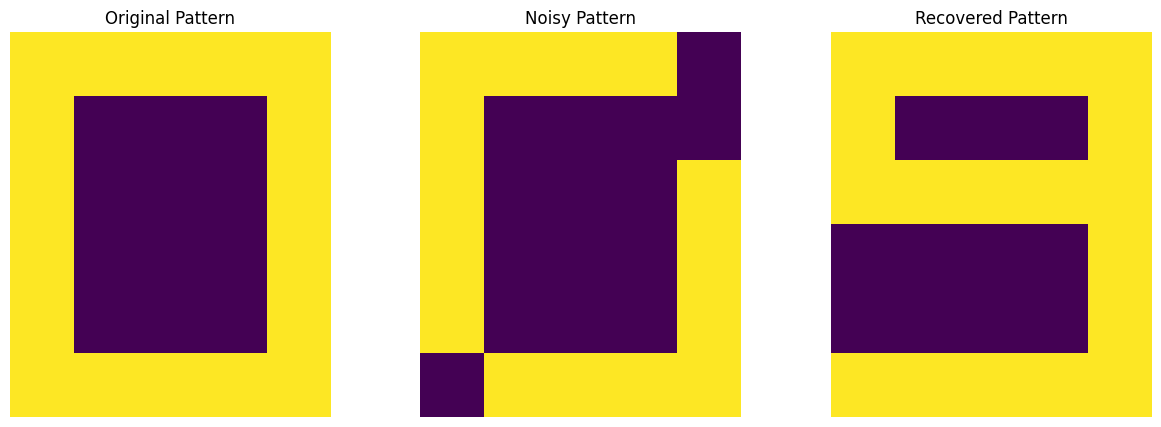

In [149]:
def plot_pattern(pattern, title):
    plt.imshow(pattern.reshape(6, 5), interpolation='none')
    plt.title(title)
    plt.axis('off')
network = HopfieldNetwork(node_num=30)
network.train(number_matrix_list)
# 选择一个测试模式并添加噪声
test_index = 0  # 例如，测试数字0
test_pattern = number_matrix_list[test_index]
noisy_pattern = add_noise(test_pattern, percentage=0.1)
# 运行网络
recovered_pattern = network.predict(noisy_pattern, steps=10)
# 可视化原始、带噪声和恢复的模式
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plot_pattern(test_pattern, 'Original Pattern')
plt.subplot(1, 3, 2)
plot_pattern(noisy_pattern, 'Noisy Pattern')
plt.subplot(1, 3, 3)
plot_pattern(recovered_pattern, 'Recovered Pattern')
plt.show()
